[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2.208495216498173


/var/folders/sb/j3m42l4j36x49gq6998z6jp00000gn/T/ipykernel_8854/2197706454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sq['Weekly Returns'] = sq['Adj Close'].pct_change()


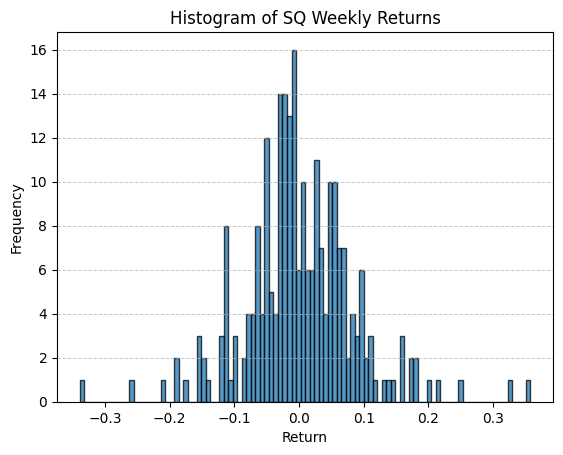

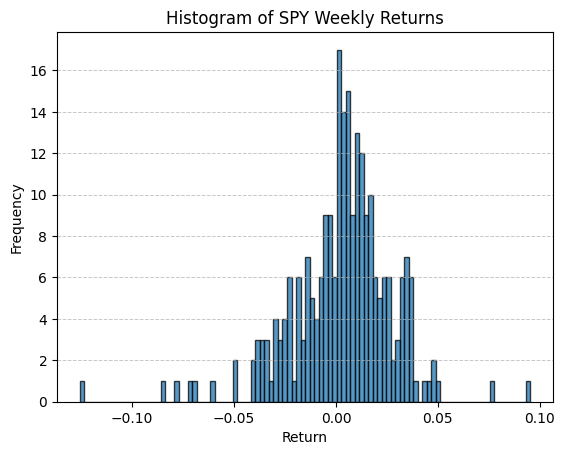

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download data
spy = yf.download('SPY', period="5y", interval='5d')[['Adj Close']]
sq = yf.download('SQ', period="5y", interval='5d')[['Adj Close']]

# Calculate the weekly returns
spy['Weekly Returns'] = spy['Adj Close'].pct_change()
sq['Weekly Returns'] = sq['Adj Close'].pct_change()

# Align data and drop NaN values
aligned_data = spy.join(sq, lsuffix='_SPY', rsuffix='_SQ').dropna()

# Extract the aligned returns
spy_returns = aligned_data['Weekly Returns_SPY']
sq_returns = aligned_data['Weekly Returns_SQ']

# Calculate beta
cov_matrix = spy_returns.cov(sq_returns)
beta = cov_matrix / spy_returns.var()
print(beta)

# Plot histograms
plt.hist(sq_returns, bins=100, alpha=0.75, edgecolor="black")
plt.title('Histogram of SQ Weekly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

plt.hist(spy_returns, bins=100, alpha=0.75, edgecolor="black")
plt.title('Histogram of SPY Weekly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()
